<a href="https://colab.research.google.com/github/MuriloWollmann/Projeto-para-exemplificar-o-processo-de-Analise-de-Dados/blob/main/Venda_de_Jogos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exemplo prático de Análise de Dados utilizando uma base de dados sobre a Venda de Jogos

Fonte: https://www.kaggle.com/datasets/gregorut/videogamesales/data

# Bibliotecas e Importações

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# Lendo a base de dados com pandas
data = pd.read_csv("/content/drive/MyDrive/Unisc/Semestres/3° Semestre/Fábrica de Software/Python/Discovery/vgsales.csv")

# Dataframe

In [ ]:
# Preencher valores ausentes com 0 ou outro valor adequado
data['Year'].fillna(0, inplace=True)

# Converter a coluna 'Year' para int
data['Year'] = data['Year'].astype(int)

In [ ]:
# Dataframe gerada
data

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


# Vendas Globais de Jogos ao longo dos anos

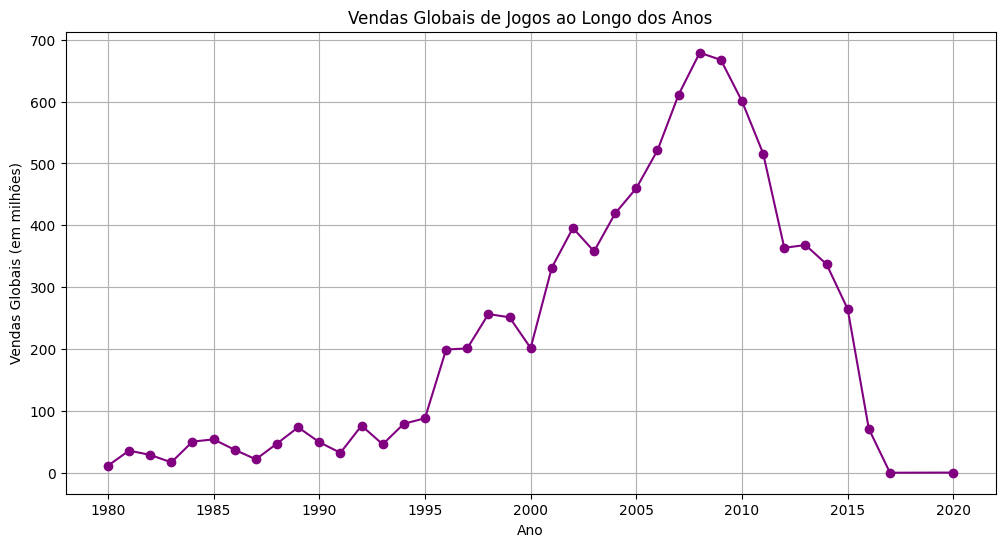

In [ ]:
# Filtrar anos maiores que 0 para evitar o impacto de valores ausentes preenchidos com 0
anosFiltrados = data[data['Year'] > 0]

# Agrupar as vendas globais por ano
# .groupby('Year') agrupa os anosFiltrados por ano e ['Global_Sales'].sum() faz a soma das vendas globais em cada ano
vendasAnuais = anosFiltrados.groupby('Year')['Global_Sales'].sum()

# Visualizar as vendas globais ao longo dos anos
# Tamanho da figura
plt.figure(figsize=(12, 6))

# Plotando os dados de vendas anuais com um marcador e cor roxa
vendasAnuais.plot(marker='o', color='purple')

# Título do gráfico
plt.title('Vendas Globais de Jogos ao Longo dos Anos')

# Texto do eixo X
plt.xlabel('Ano')

# Texto do eixo Y
plt.ylabel('Vendas Globais (em milhões)')

# Adição da grade para facilitar a compreensão
plt.grid(True)

# Mostrar gráfico
plt.show()

# Vendas Globais de Jogos por Plataforma

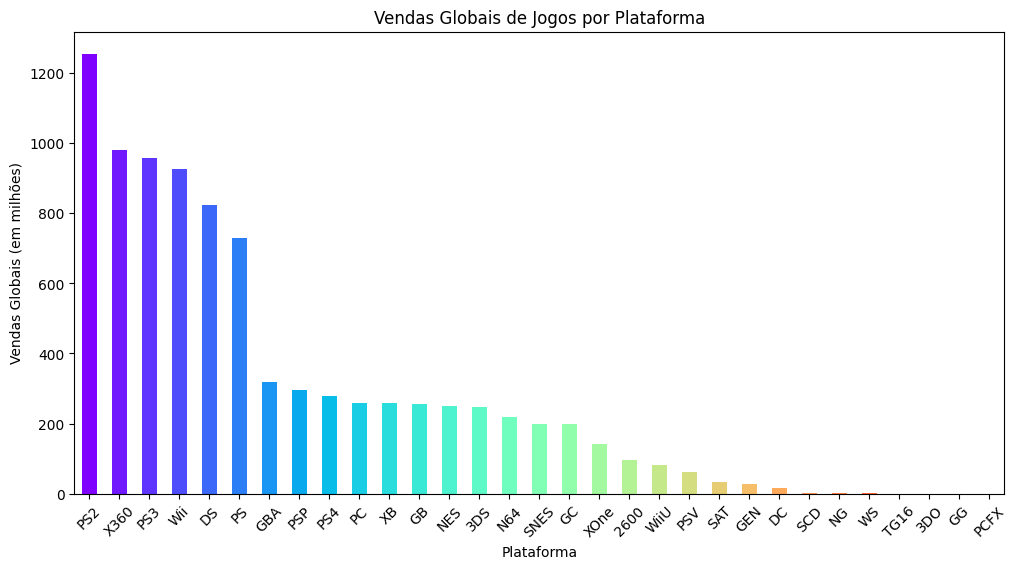

In [ ]:
# Agrupar as vendas globais por plataforma
# .sort_values(ascending=False) ordena os valores em ordem decrescente
vendasPlataforma = data.groupby('Platform')['Global_Sales'].sum().sort_values(ascending=False)

# Visualizar as vendas globais por plataforma
plt.figure(figsize=(12, 6))

# (np.linspace(0, 1, len(vendasPlataforma))) faz com que a paleta de cores rainbow defina uma cor para cada elemento no intervalo de 1
cores = plt.cm.rainbow(np.linspace(0, 1, len(vendasPlataforma)))

vendasPlataforma.plot(kind='bar', color=cores)
plt.title('Vendas Globais de Jogos por Plataforma')
plt.xlabel('Plataforma')
plt.ylabel('Vendas Globais (em milhões)')

# Rotação dos texto no eixo X
plt.xticks(rotation=45)
plt.show()

# Top 10 Gêneros de Jogos Mais Vendidos

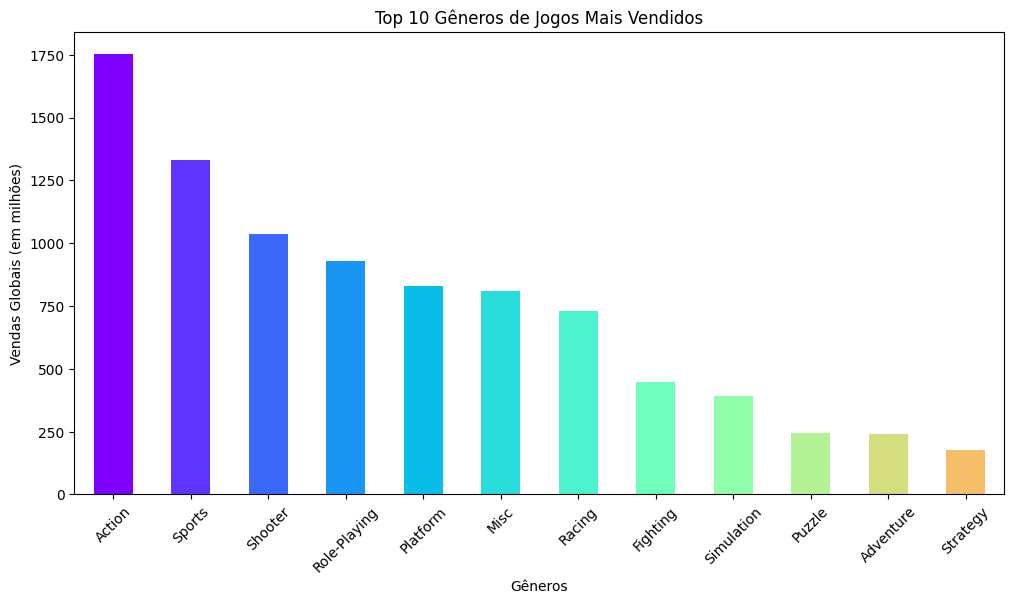

In [ ]:
# Agrupar as vendas globais por gênero
vendasGenero = data.groupby('Genre')['Global_Sales'].sum().sort_values(ascending=False)

# Visualizar as vendas globais por Gênero
plt.figure(figsize=(12, 6))

cores = plt.cm.rainbow(np.linspace(0, 2, len(vendasPlataforma)))

vendasGenero.plot(kind='bar', color=cores)
plt.title('Top 10 Gêneros de Jogos Mais Vendidos')
plt.xlabel('Gêneros')
plt.ylabel('Vendas Globais (em milhões)')
plt.xticks(rotation=45)
plt.show()

# Vendas por Região

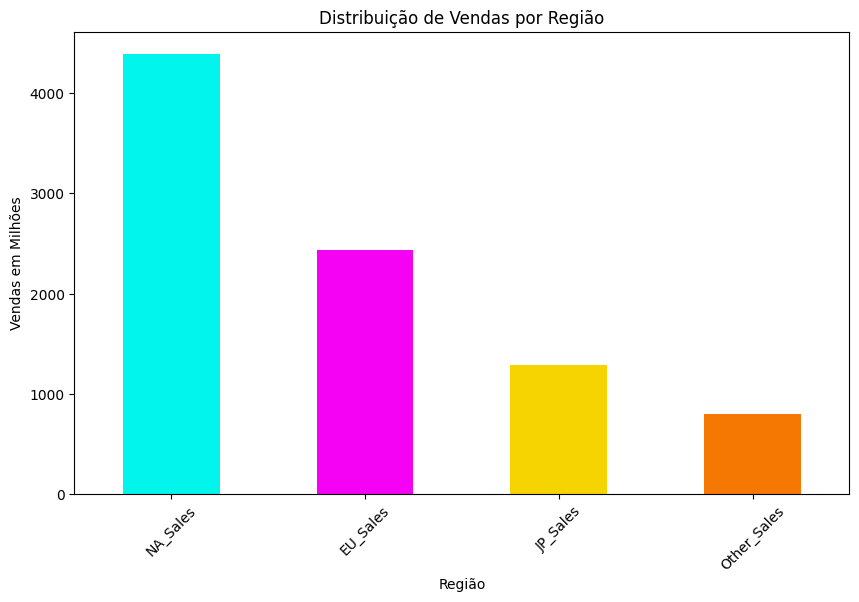

In [ ]:
# Soma das vendas em cada região
vendasSoma = data[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum()

# Visualização das vendas em cada região
plt.figure(figsize=(10, 6))

# Cores retiradas do color picker (Google)
cores = ['#02f5ed', '#f502f5', '#f5d402', '#f57802']

vendasSoma.plot(kind='bar', color=cores)
plt.title('Distribuição de Vendas por Região')
plt.xlabel('Região')
plt.ylabel('Vendas em Milhões')
plt.xticks(rotation=45)
plt.show()

# Distribuição de Vendas de jogos da Nintendo por Região

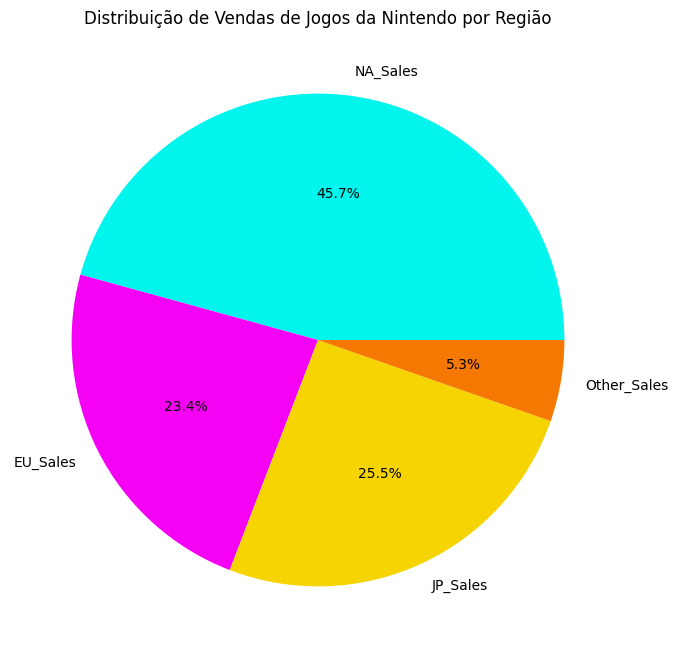

In [ ]:
# Filtrando apenas vendas de jogos da Nintendo
vendasNintendo = data[data['Publisher'] == 'Nintendo'][['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]

# Somas das vendas de jogos da Nintendo em cada região
vendasNintendoSoma = vendasNintendo.sum()

# Cores retiradas do color picker (Google)
cores = ['#02f5ed', '#f502f5', '#f5d402', '#f57802']

# Visualização
plt.figure(figsize=(8, 8))

# O gráfico de pizza necessita que os dados a serem usados as fatias sejam definidas
plt.pie(vendasNintendoSoma, labels=['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'], autopct='%1.1f%%', colors=cores)
plt.title('Distribuição de Vendas de Jogos da Nintendo por Região')
plt.show()

# Desafio

Tente fazer uma representação gráfica da venda de algum jogo de sua preferência de acordo com as regiões disponíveis.